In [63]:
import torch
import numpy as np
from sklearn.manifold import TSNE

In [64]:
def load_data(number):
    data = torch.load('./dataset/cluster_'+str(number)+'_data.pt')
    data = torch.flatten(data, start_dim=1)

    label = torch.load('./dataset/cluster_'+str(number)+'_label.pt')
    label = [i if i > 0 else 0 for i in label]
    return data, label

In [65]:
cluster_0, cluster_0_label = load_data(0)
cluster_1, cluster_1_label = load_data(1)
cluster_2, cluster_2_label = load_data(2)
cluster_3, cluster_3_label = load_data(3)

In [66]:
cluster_all = torch.cat([cluster_0, cluster_1, cluster_2, cluster_3], dim=0)

In [71]:
tsne = TSNE(n_components=2, random_state=11)
cluster_tsne = tsne.fit_transform(cluster_all.cpu().numpy())

In [72]:
cluster_tsne = cluster_tsne/np.max(np.abs(cluster_tsne))

In [73]:
len(cluster_0_label)

400

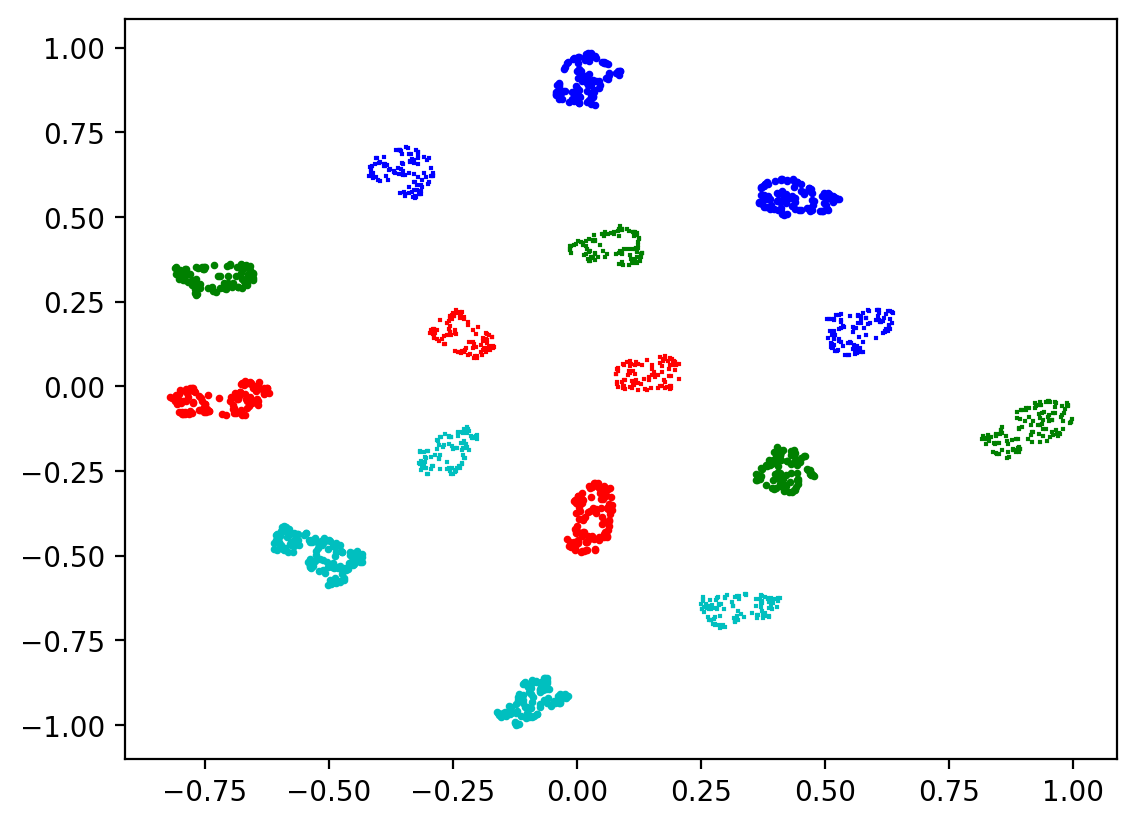

In [75]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(dpi=200)

markers = ['o', '+']

for x, y, m in zip(cluster_tsne[:400,0], cluster_tsne[:400,1], cluster_0_label):
    plt.scatter(x,y, c='b', s=3, marker=markers[m])

for x, y, m in zip(cluster_tsne[400:800,0], cluster_tsne[400:800,1], cluster_1_label):
    plt.scatter(x,y, c='g', s=3, marker=markers[m])

for x, y, m in zip(cluster_tsne[800:1200,0], cluster_tsne[800:1200,1], cluster_2_label):
    plt.scatter(x,y, c='r', s=3, marker=markers[m])

for x, y, m in zip(cluster_tsne[1200:,0], cluster_tsne[1200:,1], cluster_3_label):
    plt.scatter(x,y, c='c', s=3, marker=markers[m])

#scatter = ax.scatter(cluster_tsne[400:800,0],cluster_tsne[400:800,1], c=cluster_1_label, s=3, marker='o')
#scatter = ax.scatter(cluster_tsne[800:1200,0],cluster_tsne[800:1200,1], c=cluster_2_label, s=3, marker='v')
#scatter = ax.scatter(cluster_tsne[1200:,0],cluster_tsne[1200:,1], c=cluster_3_label, s=3, marker='^')

#ax.legend(*scatter.legend_elements(), loc="upper right")
plt.show()